In [40]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance
import numpy as np

In [41]:
# Function that creates unique id for each node

node_ids = set()

def generate_node_id(node_ids):
    new_id = random.randint(1, 1e5)
    while new_id in node_ids:
        new_id = random.randint(1, 1e5)
    node_ids.add(new_id)
    return new_id

In [42]:
# Function that returns the index of the median of the location info based on axis

def data_median(data, axis):
    indexed_data = list(enumerate(data))
    indexed_data.sort(key=lambda d: d[1][axis])
    median_index = len(indexed_data)//2
    return indexed_data[median_index][0]

In [43]:
# State capture per density_threshold

# By capturing the tree structure at each threshold, 
# you can see how features like connected components emerge, evolve, and disappear.
# This provides insights into the tree's resilience, adaptability, and the significance of its structural features.
# In the case of tree data structure, there is no hole so only connected dots (B_0) is considered

# Depth Threshold

depth_threshold = 3

# Degree/Density Threshold

density_thresholds = list(range(0, 4097, 16)) # [0, 16, 32, ..., 4096]

In [44]:
# Deterministic K-D Tree

def build_kdtree(data, source_id, depth, density_threshold, betti_0, kdtree):
    
    # Base case
    if depth >= depth_threshold or len(data) == 0:
        return betti_0, kdtree
    
    # Axis is pre-determined (by the depth)
    
    # median = data_median(data, depth) # `depth` in order of cut along in the x-, y- ,z- axis order
    median = data_median(data, 2-depth) # `2-depth` in order of cut along in the z-, y- ,x- axis order

    # Increase depth
    depth += 1

    # Split data for left and right nodes of the K-D Tree
    left_data = data[:median]
    right_data = data[median:]

    for subdivision in [left_data, right_data]:
        num_points_in_box = len(subdivision)
        target_id = generate_node_id(node_ids)

        box = [num_points_in_box, depth, source_id, target_id]
        
        if num_points_in_box > density_threshold:
            kdtree.append(box)
            betti_0, kdtree = build_kdtree(subdivision, target_id, depth, density_threshold, betti_0, kdtree)
        else:
            betti_0 += 1

    return betti_0, kdtree

### $Betti_0$ Change in House Point Clouds Across K-D Tree Density Thresholds

In [45]:
# Read the data for House Random

node_ids = set()

data_random = pd.read_csv('data/House/csv/random/house_random.csv', sep=',')[['X', 'Y', 'Z']]
data_random = data_random[['X', 'Y', 'Z']].values.tolist()
house_random_betti_0s = []

# density_threshold = 0
for density_threshold in density_thresholds:
    initial_source_id = 0 # the root
    initial_depth = 0 # the root is at depth 0
    initial_betti_0 = 1 # the root itself
    kdtree = [] # for storing the whole kdtree
    betti_0, kdtree = build_kdtree(data_random, \
                                       initial_source_id, \
                                       initial_depth, \
                                       density_threshold, \
                                       initial_betti_0, \
                                       kdtree)
    house_random_betti_0s.append(betti_0)

In [46]:
# Read the data for House Spatial

node_ids = set()

data_spatial = pd.read_csv('data/House/csv/spatial/house_spatial.csv', sep=',')[['X', 'Y', 'Z']]
data_spatial = data_spatial[['X', 'Y', 'Z']].values.tolist()
house_spatial_betti_0s = []

# density_threshold = 0
for density_threshold in density_thresholds:
    initial_source_id = 0 # the root
    initial_depth = 0 # the root is at depth 0
    initial_betti_0 = 1 # the root itself
    kdtree = [] # for storing the whole kdtree
    betti_0, kdtree = build_kdtree(data_spatial, \
                                       initial_source_id, \
                                       initial_depth, \
                                       density_threshold, \
                                       initial_betti_0, \
                                       kdtree)
    house_spatial_betti_0s.append(betti_0)

### Variances of Among the Two Distributions

In [47]:
var_house_random = np.var(np.array(house_random_betti_0s))
var_house_spatial = np.var(np.array(house_spatial_betti_0s))

print(var_house_random, var_house_spatial)

1.3422761888900663 1.54863813229572


### Wasserstein Distance Between the Two Distributions

In [48]:
was_dis_house = wasserstein_distance(house_random_betti_0s, house_spatial_betti_0s)
print(was_dis_house)

0.1206225680933853


### $Betti_0$ Change in Tree Point Clouds Across K-D Tree Density Thresholds

In [49]:
# Read the data for Tree Random

node_ids = set()

data_random = pd.read_csv('data/Tree/csv/random/tree_random.csv', sep=',')[['X', 'Y', 'Z']]
data_random = data_random[['X', 'Y', 'Z']].values.tolist()
tree_random_betti_0s = []

# density_threshold = 0 
for density_threshold in density_thresholds:
    initial_source_id = 0 # the root
    initial_depth = 0 # the root is at depth 0
    initial_betti_0 = 1 # the root itself
    kdtree = [] # for storing the whole kdtree
    betti_0, kdtree = build_kdtree(data_random, \
                                       initial_source_id, \
                                       initial_depth, \
                                       density_threshold, \
                                       initial_betti_0, \
                                       kdtree)
    tree_random_betti_0s.append(betti_0)

In [50]:
# Read the data for Tree Spatial

node_ids = set()

data_spatial = pd.read_csv('data/Tree/csv/spatial/tree_spatial.csv', sep=',')[['X', 'Y', 'Z']]
data_spatial = data_spatial[['X', 'Y', 'Z']].values.tolist()
tree_spatial_betti_0s = []

# density_threshold = 0
for density_threshold in density_thresholds:
    initial_source_id = 0 # the root
    initial_depth = 0 # the root is at depth 0
    initial_betti_0 = 1 # the root itself
    kdtree = [] # for storing the whole kdtree
    betti_0, kdtree = build_kdtree(data_spatial, \
                                       initial_source_id, \
                                       initial_depth, \
                                       density_threshold, \
                                       initial_betti_0, \
                                       kdtree)
    tree_spatial_betti_0s.append(betti_0)

### Variances of Among the Two Distributions

In [51]:
var_tree_random = np.var(np.array(tree_random_betti_0s))
var_tree_spatial = np.var(np.array(tree_spatial_betti_0s))

print(var_tree_random, var_tree_spatial)

0.6107586791624403 1.2684219291737955


### Wasserstein Distance Between the Two Distributions

In [52]:
was_dis_tree = wasserstein_distance(tree_random_betti_0s, tree_spatial_betti_0s)
print(was_dis_tree)

0.7120622568093385


### $Betti_0$ Change in Light Pole Point Clouds Across K-D Tree Density Thresholds

In [53]:
# Read the data for Light Pole Random

node_ids = set()

data_random = pd.read_csv('data/LightPole/csv/random/lightpole_random.csv', sep=',')[['X', 'Y', 'Z']]
data_random = data_random[['X', 'Y', 'Z']].values.tolist()
lightpole_random_betti_0s = []

# density_threshold = 0
for density_threshold in density_thresholds:
    initial_source_id = 0 # the root
    initial_depth = 0 # the root is at depth 0
    initial_betti_0 = 1 # the root itself
    kdtree = [] # for storing the whole kdtree
    betti_0, kdtree = build_kdtree(data_random, \
                                       initial_source_id, \
                                       initial_depth, \
                                       density_threshold, \
                                       initial_betti_0, \
                                       kdtree)
    lightpole_random_betti_0s.append(betti_0)

In [54]:
# Read the data for Light Pole Spatial

node_ids = set()

data_spatial = pd.read_csv('data/LightPole/csv/spatial/lightpole_spatial.csv', sep=',')[['X', 'Y', 'Z']]
data_spatial = data_spatial[['X', 'Y', 'Z']].values.tolist()
lightpole_spatial_betti_0s = []

# density_threshold = 0
for density_threshold in density_thresholds:
    initial_source_id = 0 # the root
    initial_depth = 0 # the root is at depth 0
    initial_betti_0 = 1 # the root itself
    kdtree = [] # for storing the whole kdtree
    betti_0, kdtree = build_kdtree(data_spatial, \
                                       initial_source_id, \
                                       initial_depth, \
                                       density_threshold, \
                                       initial_betti_0, \
                                       kdtree)
    lightpole_spatial_betti_0s.append(betti_0)

### Variances of Among the Two Distributions

In [55]:
var_lightpole_random = np.var(np.array(lightpole_random_betti_0s))
var_lightpole_spatial = np.var(np.array(lightpole_spatial_betti_0s))

print(var_lightpole_random, var_lightpole_spatial)

1.357840391224697 0.7468394676679437


### Wasserstein Distance Between the Two Distributions

In [56]:
was_dis_lightpole = wasserstein_distance(lightpole_random_betti_0s, lightpole_spatial_betti_0s)
print(was_dis_lightpole)

0.39299610894941645


### Visualizations of $Betti_0$ Change For All Input Data

### ... if the cutting order is in x,y,z-axis

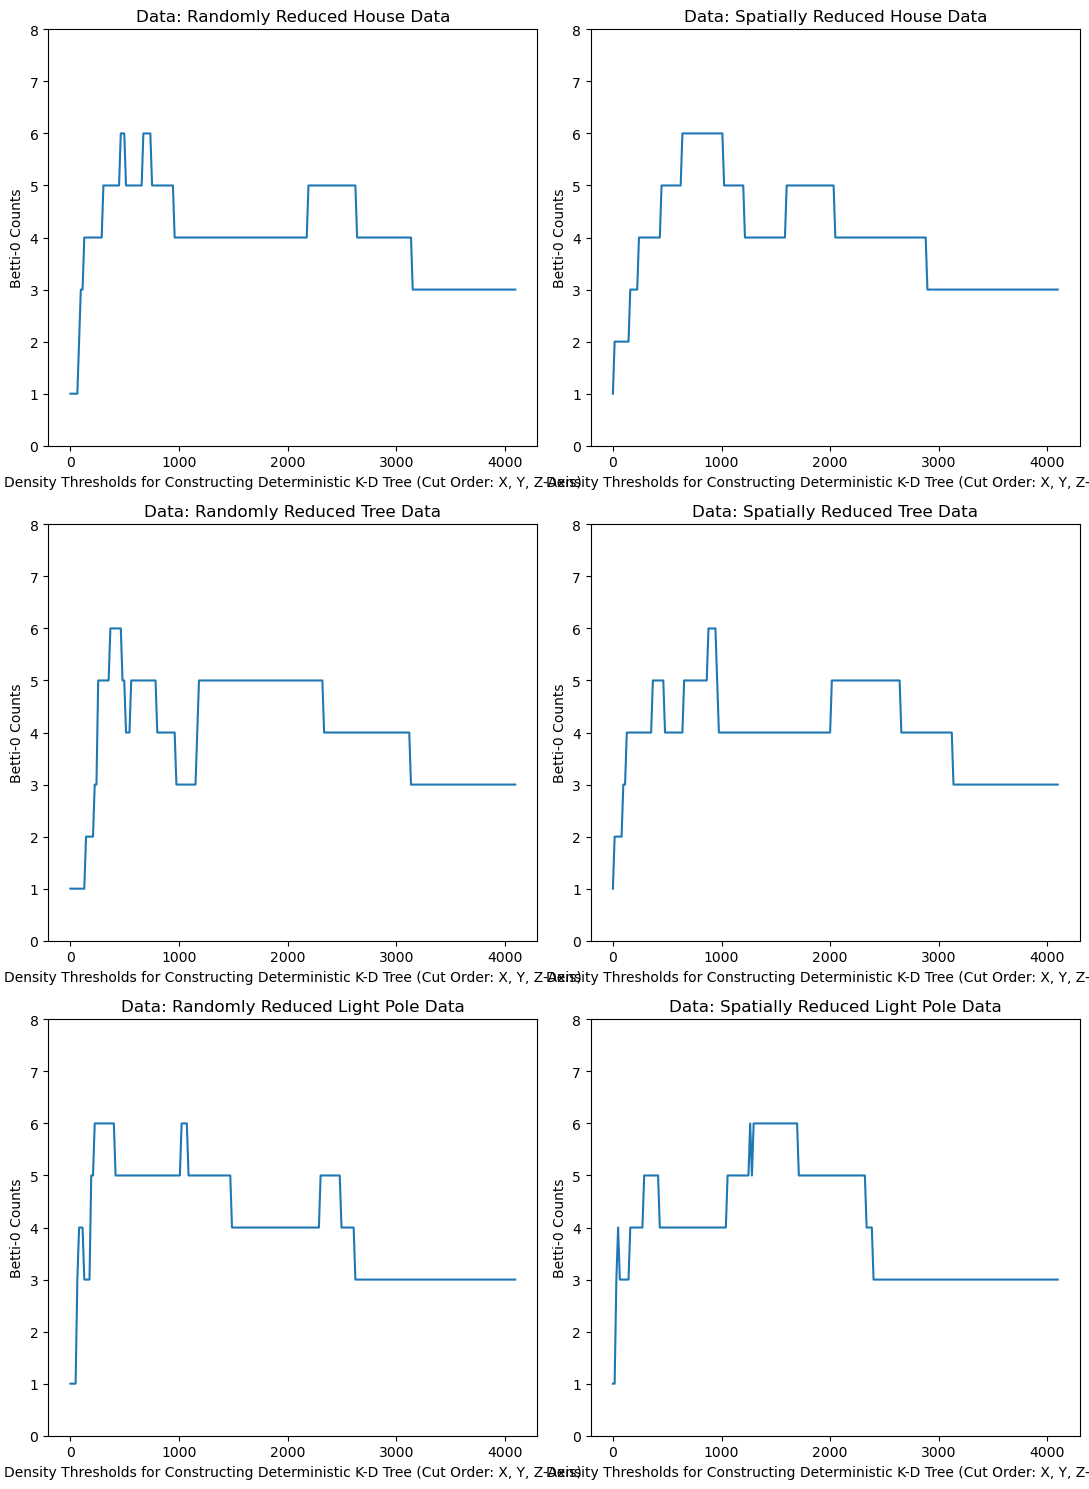

In [39]:
# Determine the global min and max y-values

# min_val = min([min(house_random_betti_0s), min(house_spatial_betti_0s), \
#            min(tree_random_betti_0s), min(tree_spatial_betti_0s), \
#            min(lightpole_random_betti_0s), min(lightpole_random_betti_0s)])
min_val = 0

# max_val = max([max(house_random_betti_0s), max(house_spatial_betti_0s), \
#            max(tree_random_betti_0s), max(tree_spatial_betti_0s), \
#            max(lightpole_random_betti_0s), max(lightpole_random_betti_0s)])
max_val = 8

# Create plot

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(11, 15))

# Plot for House Random
axs[0,0].plot(density_thresholds, house_random_betti_0s)
axs[0,0].set_xlabel('Density Thresholds for Constructing Deterministic K-D Tree (Cut Order: X, Y, Z-Axis)')
axs[0,0].set_ylabel('Betti-0 Counts')
axs[0,0].set_ylim(min_val, max_val)
axs[0,0].set_title('Data: Randomly Reduced House Data')

# Plot for House Spatial
axs[0,1].plot(density_thresholds, house_spatial_betti_0s)
axs[0,1].set_xlabel('Density Thresholds for Constructing Deterministic K-D Tree (Cut Order: X, Y, Z-Axis)')
axs[0,1].set_ylabel('Betti-0 Counts')
axs[0,1].set_ylim(min_val, max_val)
axs[0,1].set_title('Data: Spatially Reduced House Data')

# Plot for Tree Random
axs[1,0].plot(density_thresholds, tree_random_betti_0s)
axs[1,0].set_xlabel('Density Thresholds for Constructing Deterministic K-D Tree (Cut Order: X, Y, Z-Axis)')
axs[1,0].set_ylabel('Betti-0 Counts')
axs[1,0].set_ylim(min_val, max_val)
axs[1,0].set_title('Data: Randomly Reduced Tree Data')

# Plot for Tree Spatial
axs[1,1].plot(density_thresholds, tree_spatial_betti_0s)
axs[1,1].set_xlabel('Density Thresholds for Constructing Deterministic K-D Tree (Cut Order: X, Y, Z-Axis)')
axs[1,1].set_ylabel('Betti-0 Counts')
axs[1,1].set_ylim(min_val, max_val)
axs[1,1].set_title('Data: Spatially Reduced Tree Data')

# Plot for Light Pole Random
axs[2,0].plot(density_thresholds, lightpole_random_betti_0s)
axs[2,0].set_xlabel('Density Thresholds for Constructing Deterministic K-D Tree (Cut Order: X, Y, Z-Axis)')
axs[2,0].set_ylabel('Betti-0 Counts')
axs[2,0].set_ylim(min_val, max_val)
axs[2,0].set_title('Data: Randomly Reduced Light Pole Data')

# Plot for Light Pole Spatial
axs[2,1].plot(density_thresholds, lightpole_spatial_betti_0s)
axs[2,1].set_xlabel('Density Thresholds for Constructing Deterministic K-D Tree (Cut Order: X, Y, Z-Axis)')
axs[2,1].set_ylabel('Betti-0 Counts')
axs[2,1].set_ylim(min_val, max_val)
axs[2,1].set_title('Data: Spatially Reduced Light Pole Data')

plt.tight_layout()
plt.show()

### ... if the cutting order is in z,y-x-axis

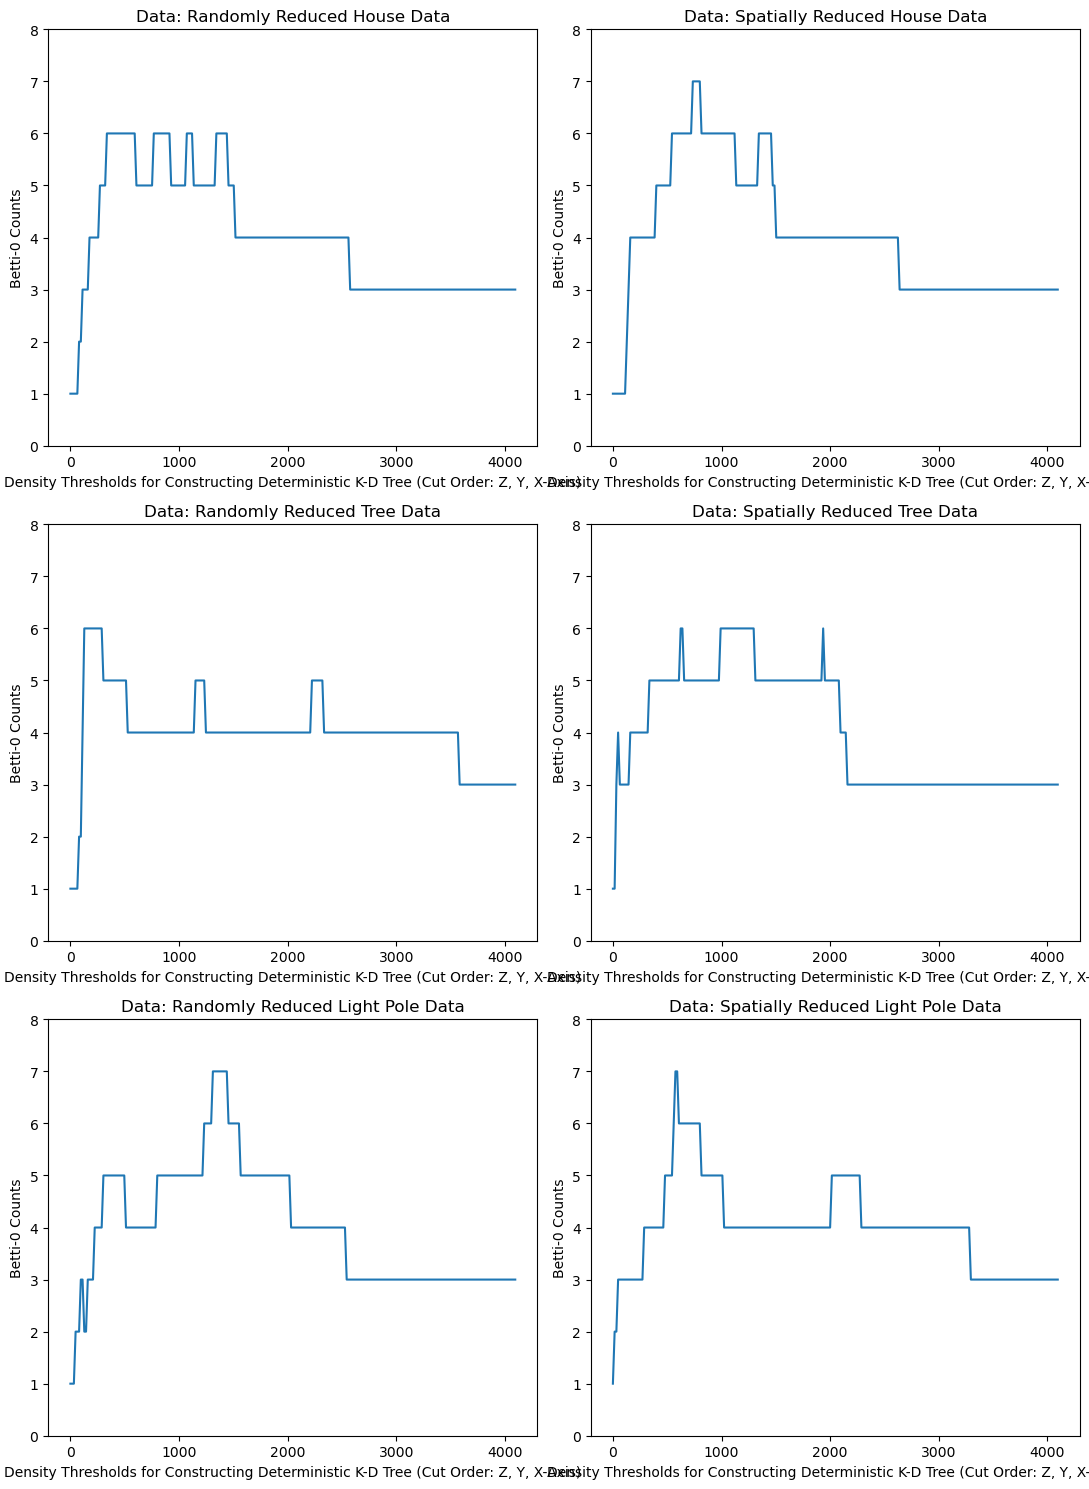

In [57]:
# Determine the global min and max y-values

# min_val = min([min(house_random_betti_0s), min(house_spatial_betti_0s), \
#            min(tree_random_betti_0s), min(tree_spatial_betti_0s), \
#            min(lightpole_random_betti_0s), min(lightpole_random_betti_0s)])
min_val = 0

# max_val = max([max(house_random_betti_0s), max(house_spatial_betti_0s), \
#            max(tree_random_betti_0s), max(tree_spatial_betti_0s), \
#            max(lightpole_random_betti_0s), max(lightpole_random_betti_0s)])
max_val = 8

# Create plot

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(11, 15))

# Plot for House Random
axs[0,0].plot(density_thresholds, house_random_betti_0s)
axs[0,0].set_xlabel('Density Thresholds for Constructing Deterministic K-D Tree (Cut Order: Z, Y, X-Axis)')
axs[0,0].set_ylabel('Betti-0 Counts')
axs[0,0].set_ylim(min_val, max_val)
axs[0,0].set_title('Data: Randomly Reduced House Data')

# Plot for House Spatial
axs[0,1].plot(density_thresholds, house_spatial_betti_0s)
axs[0,1].set_xlabel('Density Thresholds for Constructing Deterministic K-D Tree (Cut Order: Z, Y, X-Axis)')
axs[0,1].set_ylabel('Betti-0 Counts')
axs[0,1].set_ylim(min_val, max_val)
axs[0,1].set_title('Data: Spatially Reduced House Data')

# Plot for Tree Random
axs[1,0].plot(density_thresholds, tree_random_betti_0s)
axs[1,0].set_xlabel('Density Thresholds for Constructing Deterministic K-D Tree (Cut Order: Z, Y, X-Axis)')
axs[1,0].set_ylabel('Betti-0 Counts')
axs[1,0].set_ylim(min_val, max_val)
axs[1,0].set_title('Data: Randomly Reduced Tree Data')

# Plot for Tree Spatial
axs[1,1].plot(density_thresholds, tree_spatial_betti_0s)
axs[1,1].set_xlabel('Density Thresholds for Constructing Deterministic K-D Tree (Cut Order: Z, Y, X-Axis)')
axs[1,1].set_ylabel('Betti-0 Counts')
axs[1,1].set_ylim(min_val, max_val)
axs[1,1].set_title('Data: Spatially Reduced Tree Data')

# Plot for Light Pole Random
axs[2,0].plot(density_thresholds, lightpole_random_betti_0s)
axs[2,0].set_xlabel('Density Thresholds for Constructing Deterministic K-D Tree (Cut Order: Z, Y, X-Axis)')
axs[2,0].set_ylabel('Betti-0 Counts')
axs[2,0].set_ylim(min_val, max_val)
axs[2,0].set_title('Data: Randomly Reduced Light Pole Data')

# Plot for Light Pole Spatial
axs[2,1].plot(density_thresholds, lightpole_spatial_betti_0s)
axs[2,1].set_xlabel('Density Thresholds for Constructing Deterministic K-D Tree (Cut Order: Z, Y, X-Axis)')
axs[2,1].set_ylabel('Betti-0 Counts')
axs[2,1].set_ylim(min_val, max_val)
axs[2,1].set_title('Data: Spatially Reduced Light Pole Data')

plt.tight_layout()
plt.show()

### Comparison Among Z-Score Normalized Varainces in Deterministic K-D Tree

In [58]:
var = np.array([var_house_random, var_house_spatial, \
                var_tree_random, var_tree_spatial, \
                var_lightpole_random, var_lightpole_spatial])
var_normal = (var - np.mean(var)) / np.std(var)

print(abs(var_normal))

[0.5726574  1.17411535 1.55940734 0.35740341 0.61802047 1.16278928]


### Normalized Variances of the Deterministic K-D Trees Cut in x-, y-, z- axis Order

| Input Data |Variances|
| -| - |
| House (Random)  | 1.04609059  |
| House (Spatial) | 0.39481363  |
| Tree (Random) | 0.93000663  |
| Tree (Spatial) | 1.66458211  |
| Light Pole (Random) | 0.41563826  |
| Light Pole (Spatial) | 0.97021418  |

### Normalized Variances of the Deterministic K-D Trees Cut in z-, y-, x- axis Order

| Input Data |Variances|
| -| - |
| House (Random)  | 0.5726574  |
| House (Spatial) | 1.17411535  |
| Tree (Random) | 1.55940734  |
| Tree (Spatial) | 0.35740341  |
| Light Pole (Random) | 0.61802047   |
| Light Pole (Spatial) | 1.16278928  |

### Comparison Among Z-Score Normalized Wasserstein Distances in Determistic K-D Tree

In [59]:
was_dis = np.array([was_dis_house, was_dis_tree, was_dis_lightpole])

was_dis_normal = (was_dis - np.mean(was_dis)) / np.std(was_dis)

print(abs(was_dis_normal))

[1.19127791 1.25567131 0.0643934 ]


### Normalized Wasserstein Distances of the Deterministic K-D Trees Cut in x-, y-, z- axis Order

| Input Data |Variances|
| -| - |
| House | 0.01991258  |
| Tree | 1.21466717  |
| Light Pole | 1.23457975  |

### Normalized Wasserstein Distances of the Deterministic K-D Trees Cut in x-, y-, z- axis Order

| Input Data |Variances|
| -| - |
| House | 1.19127791  |
| Tree | 1.25567131  |
| Light Pole | 0.0643934  |

### Export Files for Visualization in Gephi

In [21]:
# kdtree_df = pd.DataFrame(kdtree, columns=['Degree', 'Depth', 'Source', 'Target'])

# # Edge
# # Source,Target,Type

# kdtree_df_edge = kdtree_df[['Source', 'Target']].copy()
# kdtree_df_edge['Type'] = 'Directed'

# # Node
# # Id,Degree(num_point),Depth

# kdtree_df_node = kdtree_df[['Target', 'Degree', 'Depth']]
# kdtree_df_node = kdtree_df_node.rename(columns={'Target': 'Id'})
# kdtree_df_node.loc[len(kdtree_df_node)] = {'Id': 0, 'Degree': 4096, 'Depth': 0} # append root node

# # export CSV

# kdtree_df_edge.to_csv('edge.csv', index = False)
# kdtree_df_node.to_csv('node.csv', index = False)